# Predicción de precios de viviendas con Regresión Lineal y Polinómica

En este cuaderno haremos esto:
1. Cargar y analizar un dataset
2. Preparar y visualizar los datos
3. Implementar modelos de regresión lineal y polinómica
4. Comparar visualmente los resultados
5. Hacer predicciones con nuestros modelos

Vamos a utilizar el dataset California Housing, que contiene información sobre diferentes características de viviendas en California incluyendo sus precios.


## Conceptos a recordar
- **Regresión Lineal**: Modela la relación entre variables usando una línea recta
- **Regresión Polinómica**: Extiende la regresión lineal usando términos polinómicos (cuadráticos, cúbicos, etc.)
- **Features (características)**: Variables que usamos para hacer predicciones
- **Target (objetivo)**: Variable que queremos predecir

## Configuración del Entorno

Primero importamos las bibliotecas necesarias para nuestro análisis. Cada una tiene un propósito específico:
- numpy: para operaciones matemáticas y manipulación de arrays
- pandas: para análisis y manipulación de datos
- matplotlib: para visualizaciones
- seaborn: para gráficos estadísticos más avanzados
- sklearn: para modelos de machine learning y procesamiento de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Configuración de estilo para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Carga y exploración de datos

Usaremos el dataset de California Housing, que contiene información sobre precios de viviendas en California.
Este dataset incluye variables como:
- MedInc: ingreso medio del bloque
- HouseAge: edad media de las casas en el bloque
- AveRooms: número promedio de habitaciones
- AveBedrms: número promedio de dormitorios
- Population: población del bloque
- AveOccup: promedio de ocupación
- Latitude: latitud del bloque
- Longitude: longitud del bloque

Primeras 5 filas del dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Estadísticas descriptivas:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


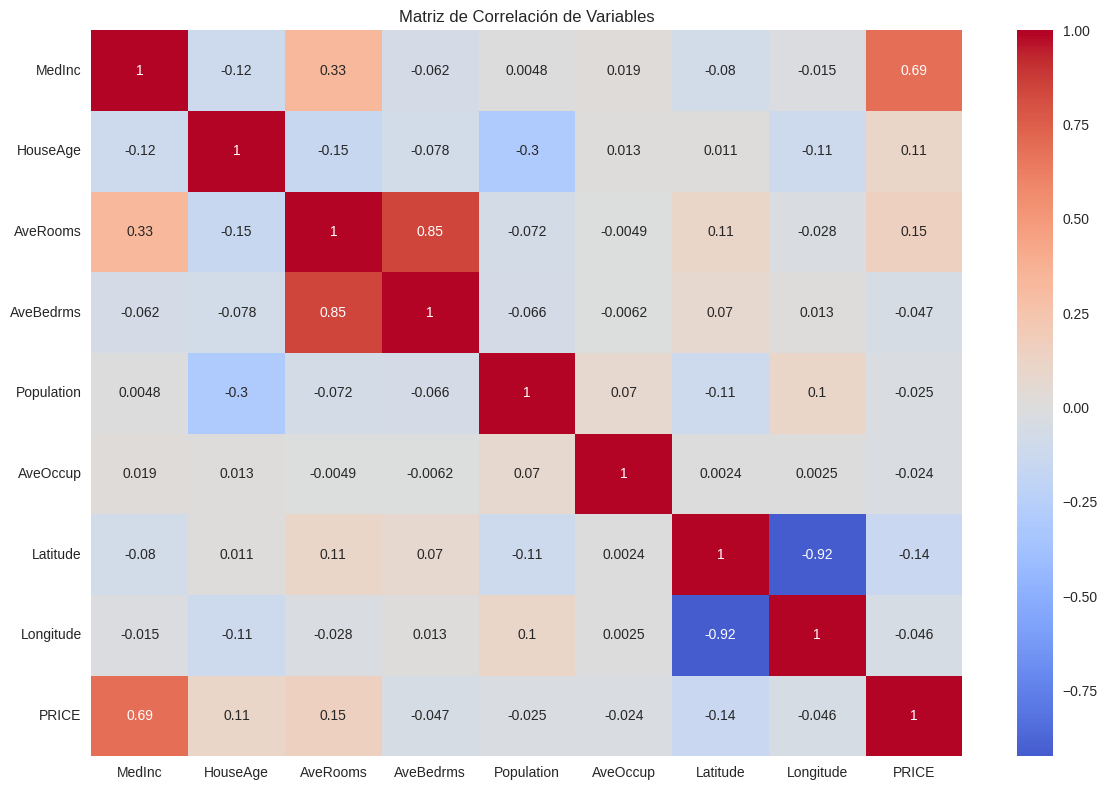

In [ ]:
# Carga del dataset
california = fetch_california_housing()

# Crear un DataFrame con todas las características
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

# Mostrar las primeras filas y las estadísticas básicas
print("Primeras 5 filas del dataset:")
display(df.head())

print("\nEstadísticas descriptivas:")
display(df.describe())

# Visualizar la correlación entre variables, utilizando la matriz que ya hemos visto en otros ejercicios
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Variables')
plt.tight_layout()
plt.show()

## Preparación de datos

Se seleccionan las características más correlacionadas con el precio según la matriz de correlación anterior.

In [16]:
# Utilizaremos las siguientes características más relevantes
selected_features = ['MedInc', 'AveRooms', 'HouseAge']
X = df[selected_features]
y = df['PRICE']

# Escalamos las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=selected_features)

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Dimensiones de los conjuntos de datos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Dimensiones de los conjuntos de datos:
X_train: (16512, 3)
X_test: (4128, 3)
y_train: (16512,)
y_test: (4128,)


## Visualización de relaciones

Vemos cómo se relaciona cada variable con el precio de las viviendas, para ello vamos a utilizar gráficas de pares (pairplot).

Un pairplot es una matriz de gráficos que muestra relaciones bivariadas (entre pares de variables) y distribuciones univariadas (de cada variable individual). Se usa comúnmente para analizar datos antes de construir modelos de machine learning.

¿Cómo interpretar cada sección?
- Distribuciones Univariadas (Diagonal)
  - Una curva simétrica y con una sola moda → La variable sigue una distribución normal.
  - Distribución sesgada (asimétrica) → Puede requerir transformación de datos (logaritmo, raíz cuadrada, etc.).
  - Picos múltiples (bimodal o multimodal) → Puede haber subgrupos dentro de los datos.
- Relaciones Bivariadas (Fuera de la diagonal), los gráficos de dispersión pueden mostrar:
  - Tendencia ascendente, hay correlación positiva (Ej: a mayor ingreso, mayor precio de la casa).
  - Tendencia descendente, hay correlación negativa (Ej: a mayor edad de la casa, menor precio).
  - Curvatura (U o inversa), relación no lineal (puede necesitar transformación polinómica).
  - Nube de puntos dispersa, no hay correlación entre las variables.
  - Agrupaciones de puntos, pueden existir clusters o categorías ocultas.


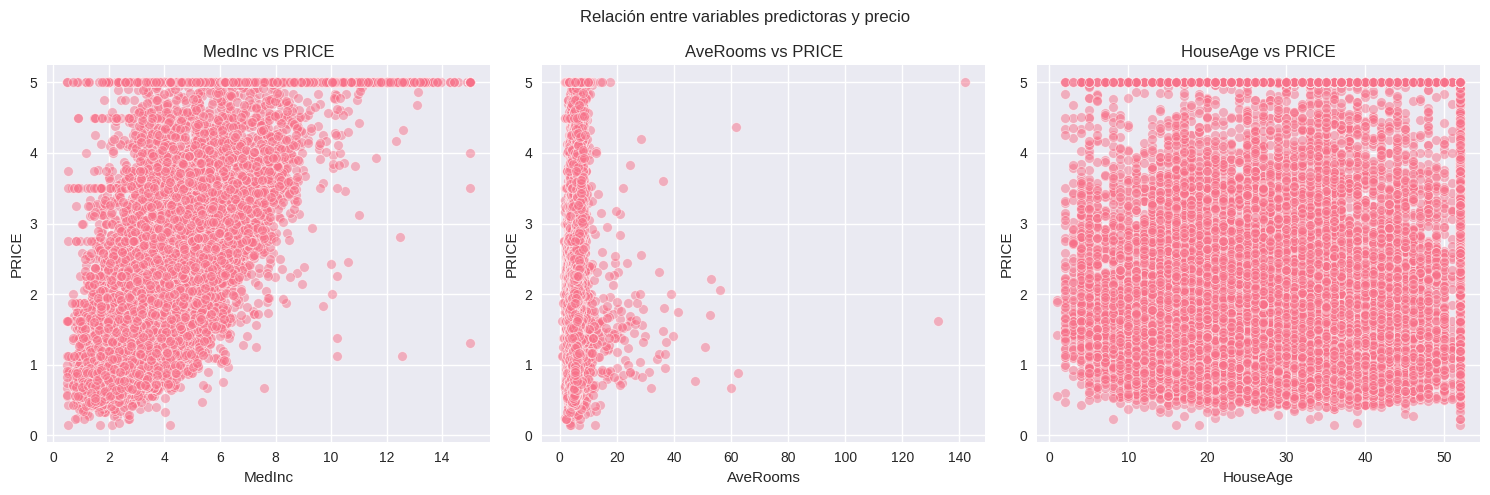

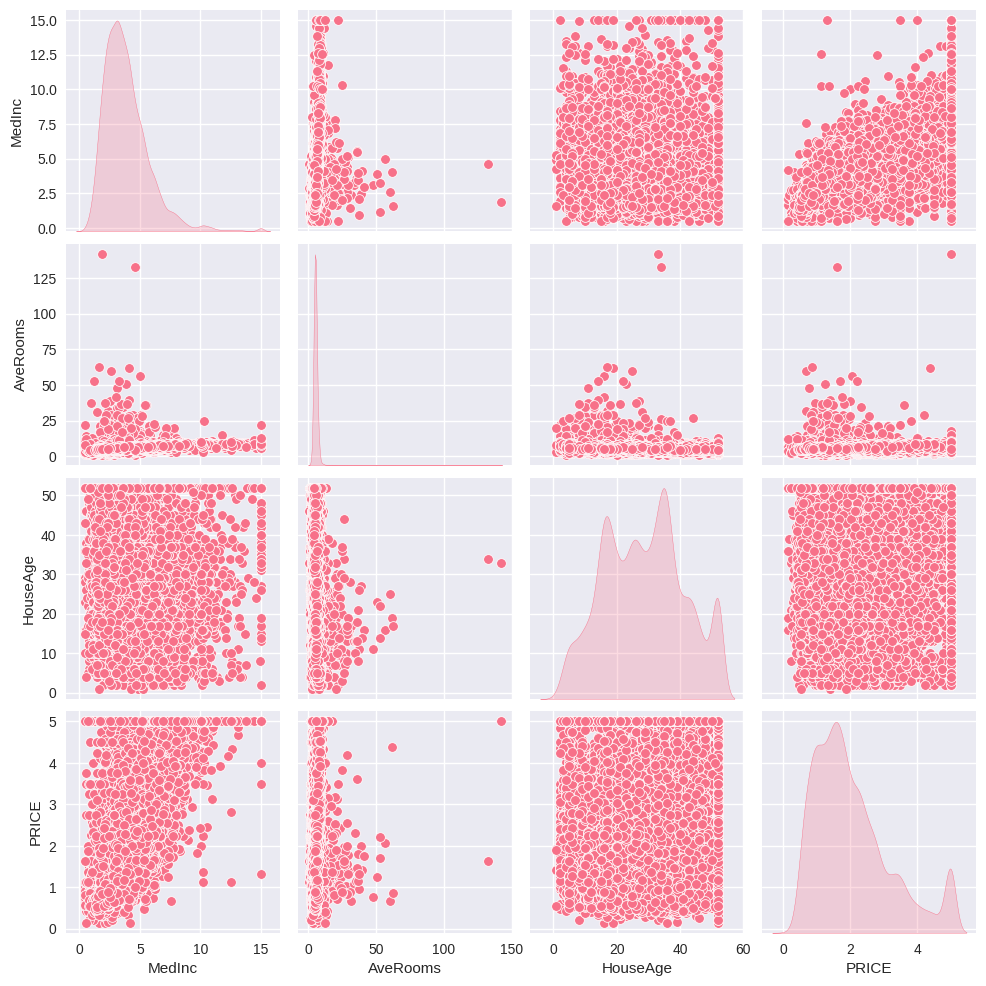

In [ ]:
# Creamos subplots para cada variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Relación entre variables predictoras y precio')

for idx, feature in enumerate(selected_features):
    sns.scatterplot(data=df, x=feature, y='PRICE', ax=axes[idx], alpha=0.5)
    axes[idx].set_title(f'{feature} vs PRICE')

plt.tight_layout()
plt.show()

# Se muestra un gráfico de pares para ver relaciones múltiples
# En lugar de histogramas, usa gráficos de densidad Kernel (KDE) para representar la distribución de cada variable.
sns.pairplot(df[selected_features + ['PRICE']], diag_kind='kde')
plt.show()

## Implementación de modelos

### Regresión Lineal Múltiple

#### **¿Qué es el intercepto?**
El **intercepto**, también llamado **término independiente** o **bias**, es un atributo del modelo de regresión (`LinearRegression`) entrenado con `scikit-learn`. Matemáticamente, en una ecuación de regresión lineal: y = b0 + b1 x1 + b2 x2 + ... + bn xn, b0 es el **intercepto** (cuando todas las variables x son 0, además b1, b2, ..., bn son los **coeficientes** de las variables independientes.

Coeficientes del modelo lineal:
MedInc: 0.8449
AveRooms: -0.0696
HouseAge: 0.2119
Intercepto: 2.0682


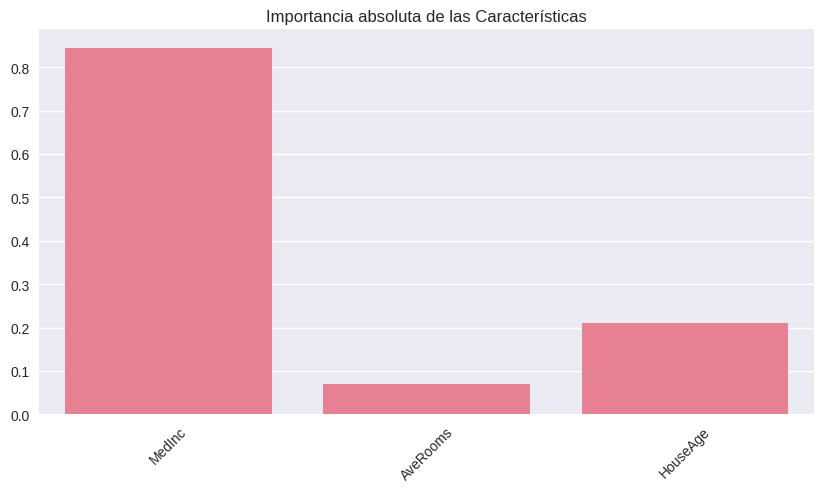

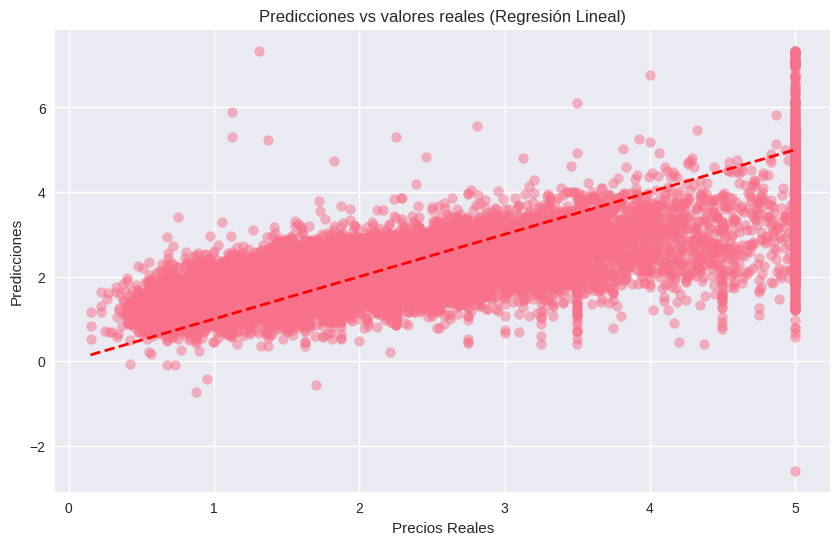

In [ ]:
# Creamos y entrenamos el modelo lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Mostramos los coeficientes
print("Coeficientes del modelo lineal:")
for feature, coef in zip(selected_features, modelo_lineal.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"Intercepto: {modelo_lineal.intercept_:.4f}")

# Visualizamos la importancia de las características
plt.figure(figsize=(10, 5))
sns.barplot(x=selected_features, y=np.abs(modelo_lineal.coef_))
plt.title('Importancia absoluta de las Características')
plt.xticks(rotation=45)
plt.show()

# Visualizamos predicciones vs valores reales
y_pred_train = modelo_lineal.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Precios Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs valores reales (Regresión Lineal)')
plt.show()

### Regresión Polinómica


Características polinómicas generadas:
MedInc: 1.0110
AveRooms: -0.3046
HouseAge: 0.1978
MedInc^2: -0.0705
MedInc AveRooms: 0.0481
MedInc HouseAge: 0.0912
AveRooms^2: 0.0094
AveRooms HouseAge: -0.1271
HouseAge^2: 0.0350


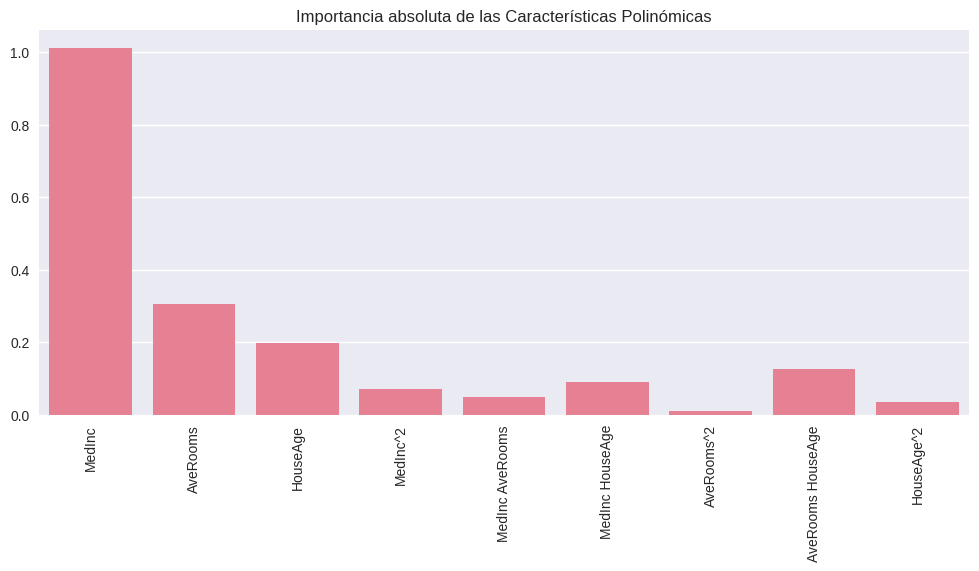

In [ ]:
# Creamos características polinómicas (grado 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Creamos y entrenamos el modelo polinómico
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train)

# Mostramos los nombres de las características polinómicas
feature_names = poly_features.get_feature_names_out(selected_features)
print("\nCaracterísticas polinómicas generadas:")
for name, coef in zip(feature_names, modelo_poly.coef_):
    print(f"{name}: {coef:.4f}")

# Importancia de las características polinómicas
plt.figure(figsize=(12, 5))
sns.barplot(x=feature_names, y=np.abs(modelo_poly.coef_))
plt.title('Importancia absoluta de las Características Polinómicas')
plt.xticks(rotation=90)
plt.show()


## Visualización de Predicciones

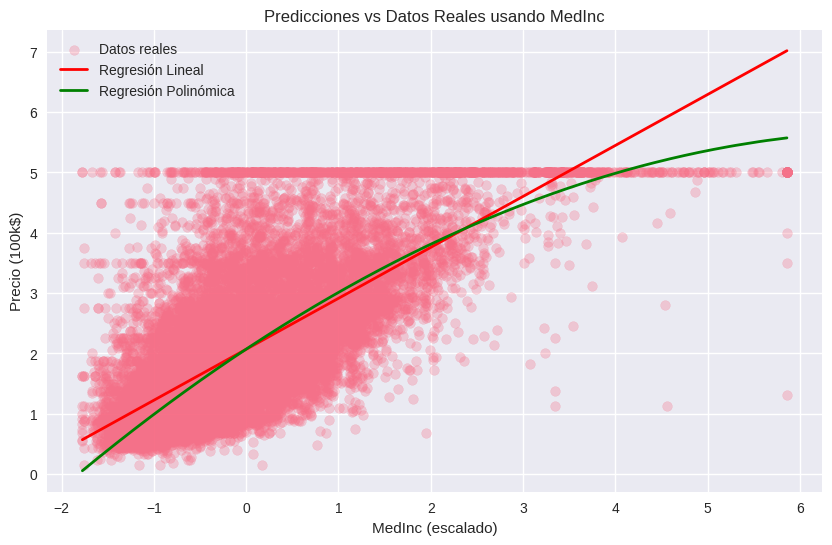

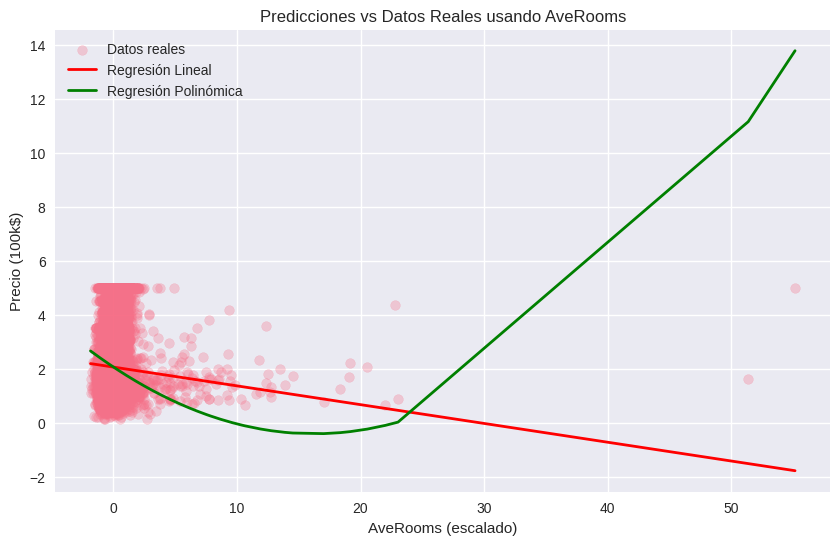

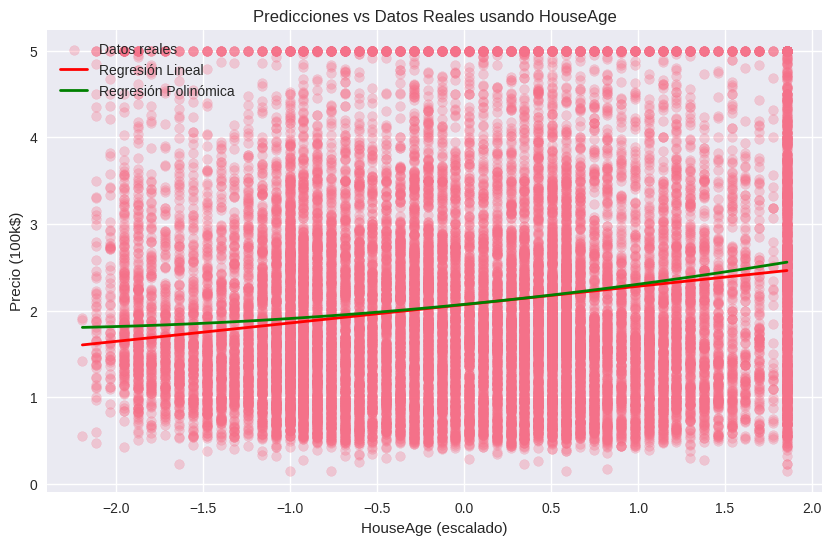

In [ ]:
def plot_predictions_vs_actual(feature, X_scaled, y, modelo_lineal, modelo_poly, poly_features):
    plt.figure(figsize=(10, 6))

    # Ordenamos los datos para visualización
    idx = X_scaled[feature].argsort()
    x_sorted = X_scaled[feature].iloc[idx]
    y_sorted = y.iloc[idx]

    # Construimos X_feature asegurando que incluya todas las columnas de X_scaled en el orden correcto
    X_feature = X_scaled.copy()
    for col in X_scaled.columns:
        if col != feature:
            X_feature[col] = X_scaled[col].mean()  # Fijamos las demás variables en su media

    # Hacemos predicciones
    y_pred_linear = modelo_lineal.predict(X_feature)
    y_pred_poly = modelo_poly.predict(poly_features.transform(X_feature))

    # Hacemos gráficas
    plt.scatter(x_sorted, y_sorted, alpha=0.3, label='Datos reales')
    plt.plot(x_sorted, y_pred_linear[idx], 'r-', label='Regresión Lineal', linewidth=2)
    plt.plot(x_sorted, y_pred_poly[idx], 'g-', label='Regresión Polinómica', linewidth=2)

    plt.xlabel(f'{feature} (escalado)')
    plt.ylabel('Precio (100k$)')
    plt.title(f'Predicciones vs Datos Reales usando {feature}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualizamos las predicciones para cada característica
for feature in selected_features:
    plot_predictions_vs_actual(feature, X_scaled, y, modelo_lineal, modelo_poly, poly_features)


## Herramienta de predicción interactiva

In [ ]:
def predecir_precio(med_inc, house_age, ave_rooms, modelo='lineal'):
    """
    Predice el precio de una vivienda basado en sus características.

    Parámetros:
    med_inc: float - Ingreso medio del vecindario
    house_age: float - Edad de la casa
    ave_rooms: float - Promedio de habitaciones
    modelo: str - 'lineal' o 'poly' para elegir el modelo

    Retorna:
    float - Precio predicho en cientos de miles de dólares
    """
    # Creamos un DataFrame con los nombres de columnas correctos
    X_nuevo = pd.DataFrame([[med_inc, ave_rooms, house_age]],
                          columns=['MedInc', 'AveRooms', 'HouseAge'])

    # Verificamos que tenemos las mismas columnas en el mismo orden que el training
    X_nuevo = X_nuevo[selected_features]

    # Escalamos los datos usando el mismo scaler
    X_nuevo_scaled = scaler.transform(X_nuevo)

    if modelo == 'lineal':
        precio = modelo_lineal.predict(X_nuevo_scaled)[0]
    else:
        X_nuevo_poly = poly_features.transform(X_nuevo_scaled)
        precio = modelo_poly.predict(X_nuevo_poly)[0]

    return precio

# Mostramos los rangos de los datos originales para referencia
print("Rangos de valores en el dataset original:")
for feature in selected_features:
    print(f"{feature}: {df[feature].min():.2f} - {df[feature].max():.2f}")

# Ejemplo de uso con valores realistas
ejemplo_casa = {
    'med_inc': 5.0,    # Ingreso medio en decenas de miles
    'house_age': 20.0, # Edad de la casa en años
    'ave_rooms': 6.0   # Promedio de habitaciones
}

print("\nRealizando predicciones...")
precio_lineal = predecir_precio(**ejemplo_casa, modelo='lineal')
precio_poly = predecir_precio(**ejemplo_casa, modelo='poly')

print(f"\nPara una casa con:")
for k, v in ejemplo_casa.items():
    print(f"- {k}: {v}")

print(f"\nPredicciones:")
print(f"- Modelo Lineal: ${precio_lineal:.2f}k")
print(f"- Modelo Polinómico: ${precio_poly:.2f}k")

Rangos de valores en el dataset original:
MedInc: 0.50 - 15.00
AveRooms: 0.85 - 141.91
HouseAge: 1.00 - 52.00

Realizando predicciones...

Para una casa con:
- med_inc: 5.0
- house_age: 20.0
- ave_rooms: 6.0

Predicciones:
- Modelo Lineal: $2.41k
- Modelo Polinómico: $2.45k


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


## **Ejercicios**





1. En lugar del `StandardScaler` utiliza:
    ```python
      from sklearn.preprocessing import MinMaxScaler
      scaler = MinMaxScaler()
    ```
   - Comprueba las predicciones nuevas con respecto a las iniciales ¿hay diferencia?
   - Busca en Internet como funciona MinMaxScaler y cuándo se suele utilizar.

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=selected_features)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Dimensiones de los conjuntos de datos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Dimensiones de los conjuntos de datos:
X_train: (16512, 3)
X_test: (4128, 3)
y_train: (16512,)
y_test: (4128,)


2. Añade un nuevo ejemplo para predecir con estos valores:

    ```python
      ejemplo_casa2 = {
        'med_inc': 60.0,    # Ingreso medio en decenas de miles
        'house_age': 20.0, # Edad de la casa en años
        'ave_rooms': 6.0   # Promedio de habitaciones
      }
    ```
    - ¿Que sucede al hacer una predicción con estos datos?
    - ¿Por qué puede suceder eso?

3. Podemos usar `Ridge` Regression en lugar de `LinearRegression`, ya que Ridge añade una penalización que estabiliza los coeficientes y evita valores extremos.

  Prueba a cambiarlo utilizando el siguiente código y comenta lo que veas distinto:

    ```python
      from sklearn.linear_model import Ridge

      # Crear el modelo polinómico con regularización Ridge
      modelo_poly = Ridge(alpha=1.0)  # Puedes ajustar alpha según sea necesario
    ```
